In [ ]:
#importing all the required python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BigBasket Products.csv')
df.head()
clone = df.copy()

In [ ]:
#using the shape function to know the number of rows and columns
df.shape

(27555, 10)

In [ ]:
#finding the null values
print(df.isnull().sum())

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64


In [ ]:
#using describe function to get the statistical information of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,27555.0,13778.000000,7954.587670,1.00,6889.5,13778.0,20666.5,27555.0
sale_price,27555.0,322.514808,486.263116,2.45,95.0,190.0,359.0,12500.0
market_price,27555.0,382.056664,581.730717,3.00,100.0,220.0,425.0,12500.0
rating,18929.0,3.943410,0.739063,1.00,3.7,4.1,4.3,5.0


In [ ]:
#using nunique function to know the number of unique values in each column
df.nunique()

index           27555
product         23540
category           11
sub_category       90
brand            2313
sale_price       3256
market_price     1348
type              426
rating             40
description     21944
dtype: int64

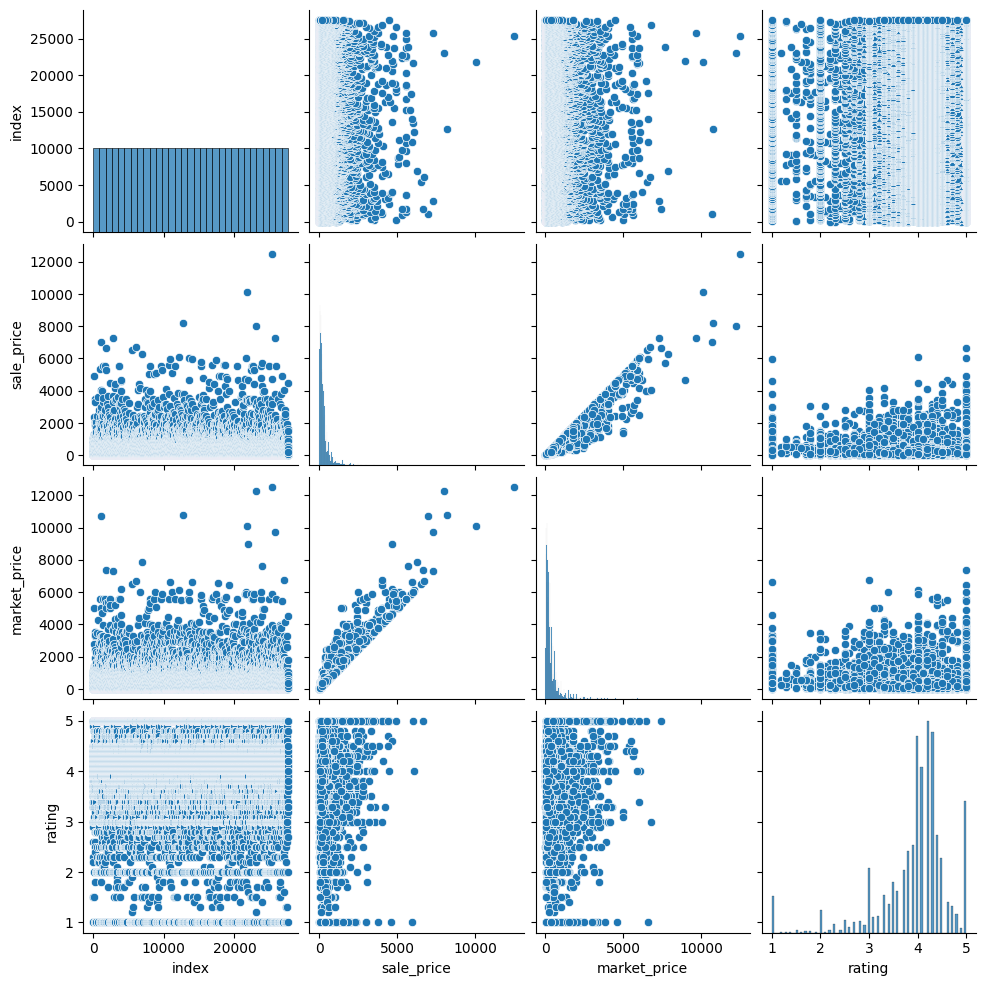

In [ ]:
sns.pairplot(df)
plt.show()

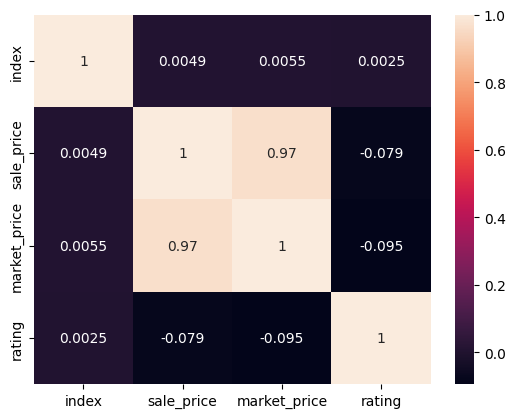

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()
#Here we can see that market_price and sale_price are highly correlated to each other

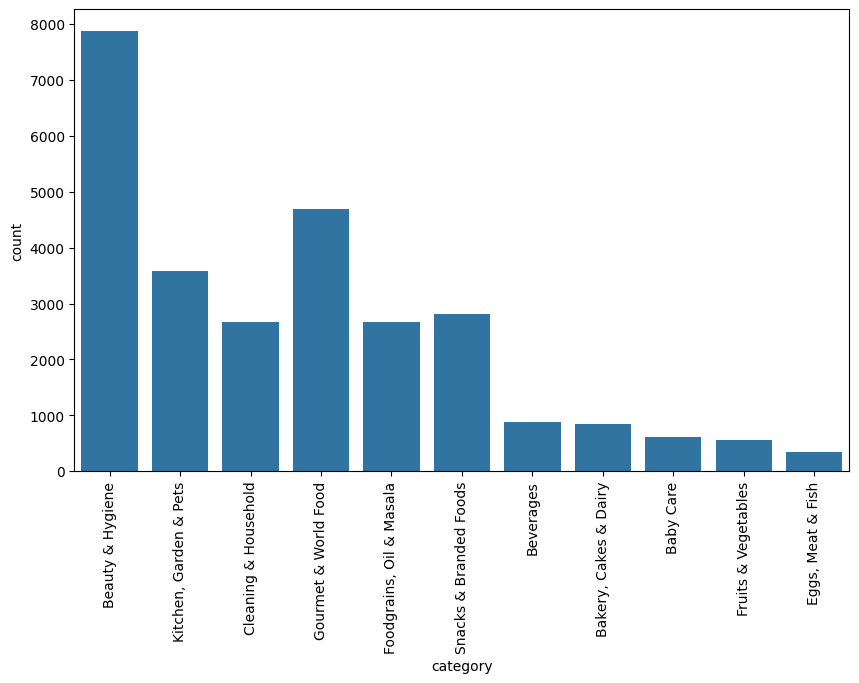

In [ ]:
#plotting  the count plot using sns to know the count of each category

plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# To train the data we need numeric columns, so we are using frequency encoder technique.
# This technique will replace the categorical values to there count frequency i.e into numeric value.
# we are using normalize = true to bring all the values into one scale.

category_frequency_map = df['category'].value_counts(normalize = True)

In [ ]:
df['category']=df['category'].map(category_frequency_map)

In [ ]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,0.285502,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,0.129922,Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",0.097079,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,0.097079,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,0.285502,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [ ]:
sub_category_counts= print(df['sub_category'].value_counts())

sub_category
Skin Care                   2294
Health & Medicine           1133
Hair Care                   1028
Storage & Accessories       1015
Fragrances & Deos           1000
                            ... 
Mutton & Lamb                 20
Water                         17
Flower Bouquets, Bunches       8
Pork & Other Meats             5
Marinades                      1
Name: count, Length: 90, dtype: int64


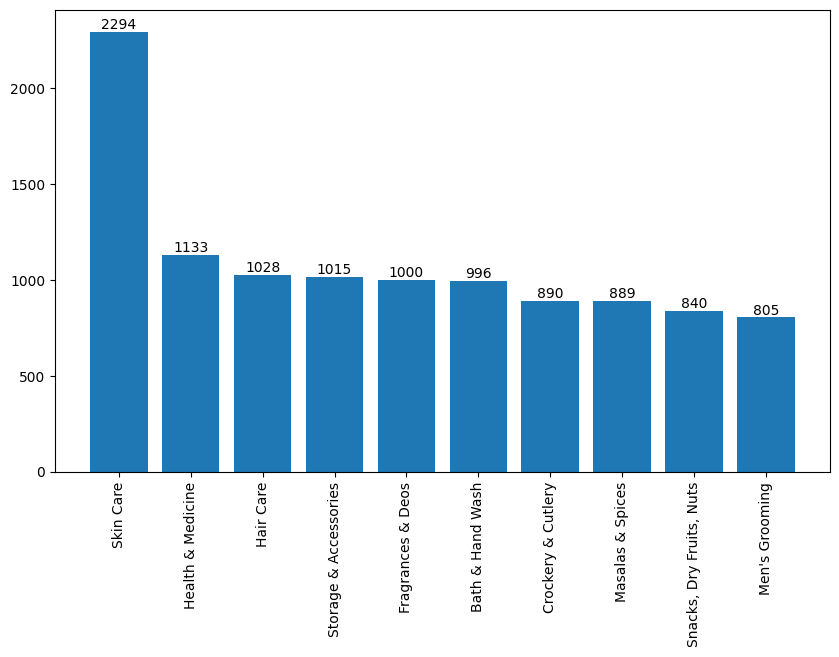

In [ ]:
# Count plot for top 10 sub_category.

plt.figure(figsize=(10, 6))
fig = plt.bar(df['sub_category'].value_counts().head(10).index, df['sub_category'].value_counts().head(10))
plt.xticks(rotation=90)
for i in fig.patches:
    plt.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')
plt.show()

In [ ]:
df['sub_category'] = df['sub_category'].astype(str)

In [ ]:
sub_category_counts = df['sub_category'].value_counts()

In [ ]:
 # sub_catogory has huge number of unique values so by using function replace all the sub_category having count less than 300 to 'others'.
less_frequent_sub_categories = sub_category_counts[sub_category_counts < 300].index.tolist()

In [ ]:
def replace_less_frequent_sub_category(sub_category):
    if sub_category in less_frequent_sub_categories:
        return 'others'
    else:
        return sub_category

In [ ]:
df['sub_category'] = df['sub_category'].apply(replace_less_frequent_sub_category)

In [ ]:
# using frequency encoder technique to change categorical values into numeric.
sub_category_frequency_map =df['sub_category'].value_counts(normalize=True)

In [ ]:
df['sub_category'] = df['sub_category'].map(sub_category_frequency_map)

In [ ]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,0.285502,0.037307,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,0.129922,0.036835,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",0.097079,0.283578,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,0.097079,0.014226,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,0.285502,0.036146,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [ ]:
df['sub_category'].value_counts()

sub_category
0.283578    7814
0.083252    2294
0.041118    1133
0.037307    1028
0.036835    1015
0.036291    1000
0.036146     996
0.032299     890
0.032263     889
0.030484     840
0.029214     805
0.026710     736
0.025150     693
0.024206     667
0.023807     656
0.023335     643
0.011069     610
0.022101     609
0.018146     500
0.017238     475
0.014879     410
0.014226     392
0.013972     385
0.012920     356
0.012847     354
0.012811     353
0.012629     348
0.012121     334
0.011976     330
Name: count, dtype: int64

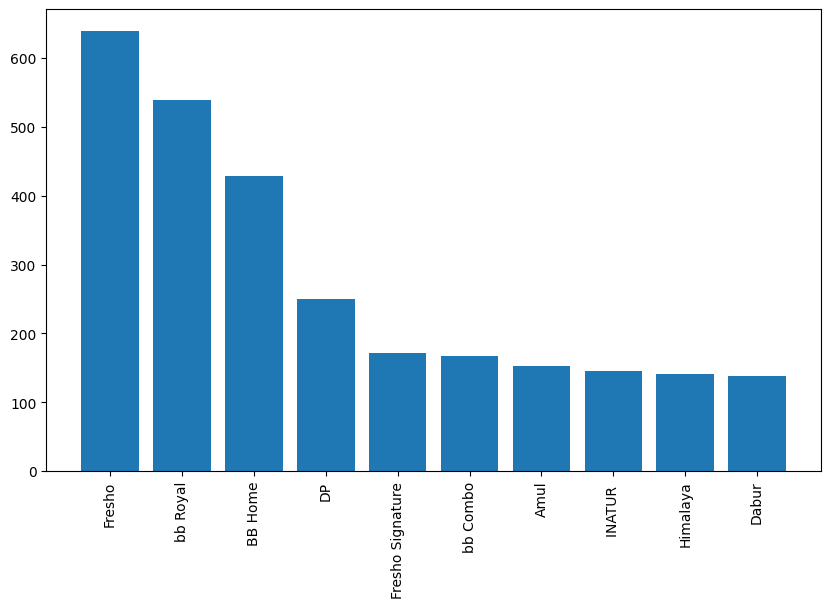

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df['brand'].value_counts().head(10).index, df['brand'].value_counts().head(10))
plt.xticks(rotation=90)
plt.show()

In [ ]:
brand_counts=(df['brand'].value_counts())

In [ ]:
df['brand'] = df['brand'].astype(str)

In [ ]:
df = df.dropna(subset=['brand'])

In [ ]:
# brand column has huge number of unique values so by using function replace all the brands having count less than 40 to 'others'.
less_frequent_brands = brand_counts[brand_counts < 40].index.tolist()

In [ ]:
def replace_less_frequent_brand(brand):
    if brand in less_frequent_brands:
        return 'others'
    else:
        return brand

In [ ]:
df['brand'] = df['brand'].apply(replace_less_frequent_brand)

In [ ]:
df['brand'].value_counts()

brand
others       15618
Fresho         638
bb Royal       539
BB Home        428
DP             250
             ...  
Man Arden       40
Abbies          40
Polyset         40
Nayasa          40
nan              1
Name: count, Length: 153, dtype: int64

In [ ]:
brand_frequency_map =df['brand'].value_counts(normalize=True)

In [ ]:
df['brand'] = df['brand'].map(brand_frequency_map)

In [ ]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,0.285502,0.037307,0.566794,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,0.129922,0.036835,0.002105,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",0.097079,0.283578,0.001524,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,0.097079,0.014226,0.003738,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,0.285502,0.036146,0.003157,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [ ]:
df['rating'].fillna(df['rating'].mean(), inplace=True)

In [ ]:
df['type'].value_counts().head(100)

type
Face Care                    1508
Ayurveda                      538
Men's Deodorants              500
Shampoo & Conditioner         461
Glassware                     415
                             ... 
Bakery Biscuits, Cookies       89
Organic Flours                 89
Agarbatti, Incense Sticks      88
Tools & Accessories            87
Bath & Shower                  86
Name: count, Length: 100, dtype: int64

In [ ]:
type_group_counts = df.groupby('type').size()

In [ ]:
#type column has huge number of unique values so by using function replace all the types having count less than 80 to 'others'.
less_frequent_types = type_group_counts[type_group_counts < 80].index.tolist()

In [ ]:
def replace_less_frequent_types(type):
    if type in less_frequent_types:
        return 'others'
    else:
        return type

In [ ]:
df['type'] = df['type'].apply(replace_less_frequent_types)

In [ ]:
df['type'].value_counts()

type
others                    8629
Face Care                 1508
Ayurveda                   538
Men's Deodorants           500
Shampoo & Conditioner      461
                          ... 
Moustache & Beard Care      83
Health Drinks               82
Tea Bags                    82
Tawa & Sauce Pan            82
Toilet Cleaners             81
Name: count, Length: 109, dtype: int64

In [ ]:
type_frequency_map =df['type'].value_counts(normalize=True)

In [ ]:
df['type'] = df['type'].map(type_frequency_map)

In [ ]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,0.285502,0.037307,0.566794,220.0,220.0,0.007875,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,0.129922,0.036835,0.002105,180.0,180.0,0.010706,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",0.097079,0.283578,0.001524,119.0,250.0,0.313156,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,0.097079,0.014226,0.003738,149.0,176.0,0.005262,3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,0.285502,0.036146,0.003157,162.0,162.0,0.014154,4.4,Nivea Creme Soft Soap gives your skin the best...


In [ ]:
df.shape

(27555, 10)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['index', 'product', 'description', 'sale_price'], axis=1)
y = df['sale_price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#using standard scaler to scale the data.
scaler = StandardScaler()
X_train[['market_price', 'rating']] = scaler.fit_transform(X_train[['market_price', 'rating']])
X_test[['market_price', 'rating']] = scaler.transform(X_test[['market_price', 'rating']])

In [ ]:
#importing all the required models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

In [ ]:
# Calculating the MSE for each model.
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} MSE: {mse}")

Linear Regression MSE: 16719.79846108627
Decision Tree MSE: 16813.846143691528
Random Forest MSE: 10463.754271069734
Gradient Boosting MSE: 12193.024579283967


In [ ]:
#we get the best result from Random Forest
#importing grid search cv to find the best parameters for the model

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  10.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  10.6s
[CV] END ma

In [ ]:
# the best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
#we will use this parameters to train the model
best_model = RandomForestRegressor(n_estimators=300, max_depth=None, min_samples_split=2, min_samples_leaf=2)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest MSE: {mse}")

Random Forest MSE: 11006.614398277281


In [ ]:
#calculating the RMSE
rmse = mean_squared_error(y_test, y_pred,squared=False)
print(f"Random Forest RMSE: {rmse}")

Random Forest RMSE: 104.91241298472399


In [ ]:
#calculating the r2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9515142237272922

In [ ]:
def adjusted_r2_score(r2_score,n,k):
  return 1 - (1-r2_score)*(n-1)/(n-k-1)

In [ ]:
#calculating the adjusted r2 score
adjusted_r2_score(r2_score(y_test, y_pred), X_test.shape[0], X_train.shape[1])

0.951461368593274

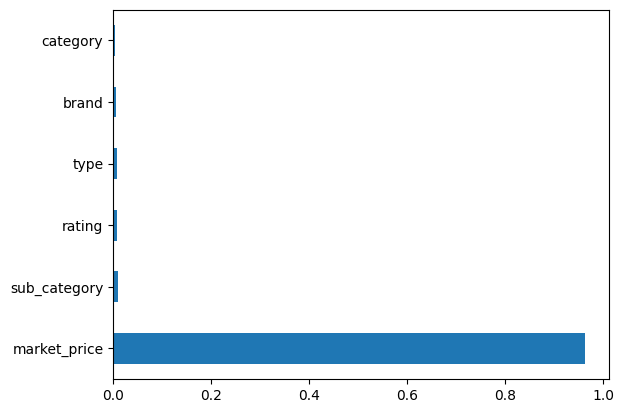

In [ ]:
feature_importance = pd.Series(best_model.feature_importances_, index=X_train.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()

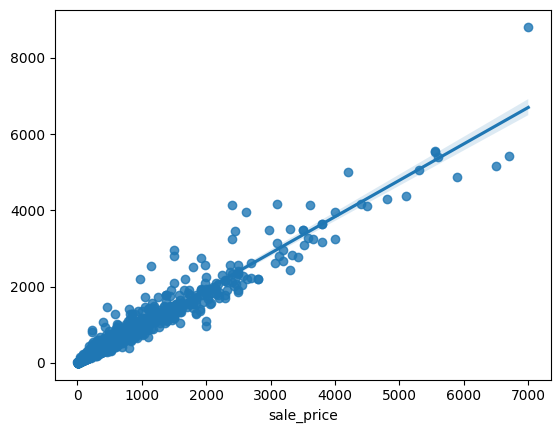

In [ ]:

sns.regplot(x=y_test, y=y_pred)
plt.show()

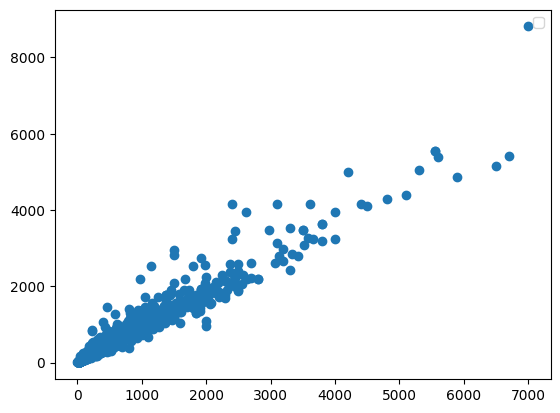

In [ ]:
#showing the actual and predicted values
plt.scatter(y_test,y_pred)
#plt.scatter(y_pred, label='Predicted')
plt.legend()
plt.show()